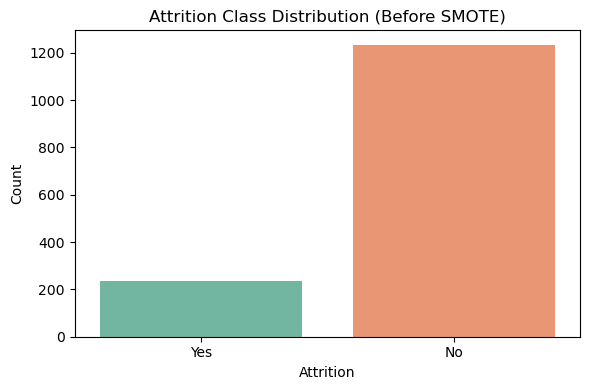

Original class distribution:
Attrition
No     1233
Yes     237
Name: count, dtype: int64


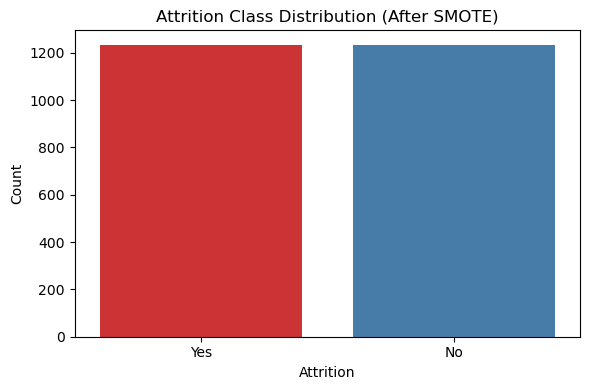


Class distribution after SMOTE:
Counter({1: 1233, 0: 1233})


In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from collections import Counter

# 1. Load your dataset
df = pd.read_csv("dataset_attrition.csv")

# 2. Show original class distribution (visual)
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Attrition', palette='Set2')
plt.title("Attrition Class Distribution (Before SMOTE)")
plt.xlabel("Attrition")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Print original class counts
print("Original class distribution:")
print(df['Attrition'].value_counts())

# 3. Encode target variable
le = LabelEncoder()
df['Attrition_Encoded'] = le.fit_transform(df['Attrition'])  # Yes=1, No=0

# 4. Split features and target
X = df.drop(columns=['Attrition', 'Attrition_Encoded'])
X = pd.get_dummies(X)  # One-hot encode categorical features
y = df['Attrition_Encoded']

# 5. Apply SMOTE
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)

# 6. Visualize class distribution after SMOTE
y_res_df = pd.DataFrame({'Attrition': y_resampled.map({0: 'No', 1: 'Yes'})})
plt.figure(figsize=(6, 4))
sns.countplot(data=y_res_df, x='Attrition', palette='Set1')
plt.title("Attrition Class Distribution (After SMOTE)")
plt.xlabel("Attrition")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Print balanced class counts
print("\nClass distribution after SMOTE:")
print(Counter(y_resampled))

In [45]:
import pandas as pd

# Convert X_resampled to DataFrame (if it's not already)
X_res_df = pd.DataFrame(X_resampled)

# If X had column names, you can restore them like:
# X_res_df.columns = original_X.columns

# Add the target column back
X_res_df['Attrition'] = y_resampled.map({0: 'No', 1: 'Yes'})  # or just y_resampled if you prefer 0/1

# Save to CSV
X_res_df.to_csv("dataset_attrition_balanced.csv", index=False)

print("Balanced dataset saved as 'dataset_attrition_balanced.csv'")

Balanced dataset saved as 'dataset_attrition_balanced.csv'


Data loaded successfully.
Original Data shape: (2466, 56)

--- Starting Preprocessing ---
Missing numerical values imputed with mean.
Missing categorical values imputed with most frequent.

Checking for outliers using IQR method...

Top 5 Features with most outliers:
                          Outlier_Count
TrainingTimesLastYear              318
YearsSinceLastPromotion            311
PerformanceRating                  250
JobLevel                           192
YearsAtCompany                     149

Visualizing outliers for top 3 features...


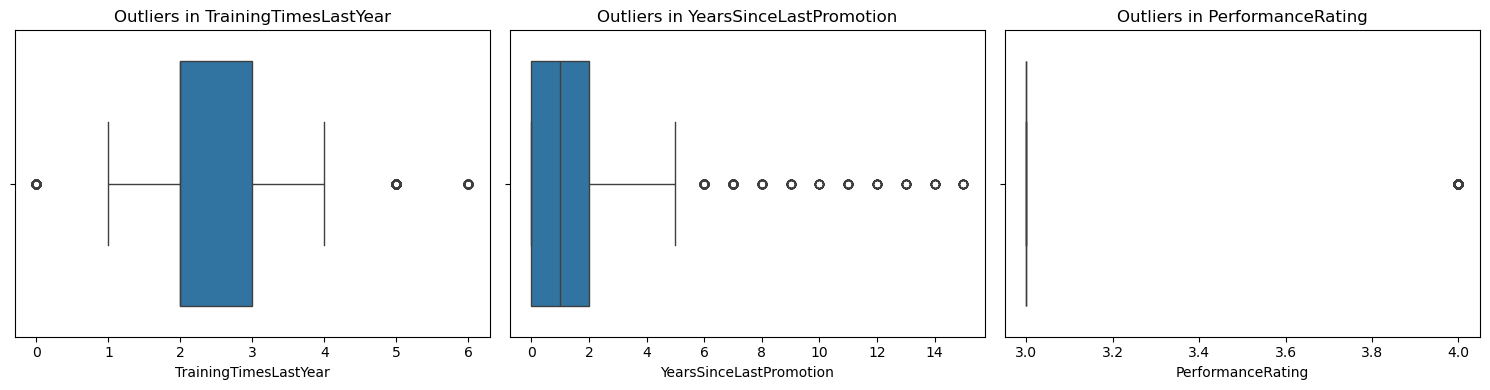


Applying Label Encoding to object type columns...
Label Encoding target variable: Attrition

--- Splitting Data ---
Data split into Train (1972 samples) and Test (494 samples).

Applying MinMaxScaler to features (fitting on Train, transforming Train & Test)...
Features scaled.

--- Starting Modeling ---

Training Support Vector Machine (SVM)...
Trying C values: [0.1, 1, 10]
  C=0.1: Accuracy=0.8968, AUC=0.9675
  C=1: Accuracy=0.9150, AUC=0.9740
  C=10: Accuracy=0.9190, AUC=0.9653


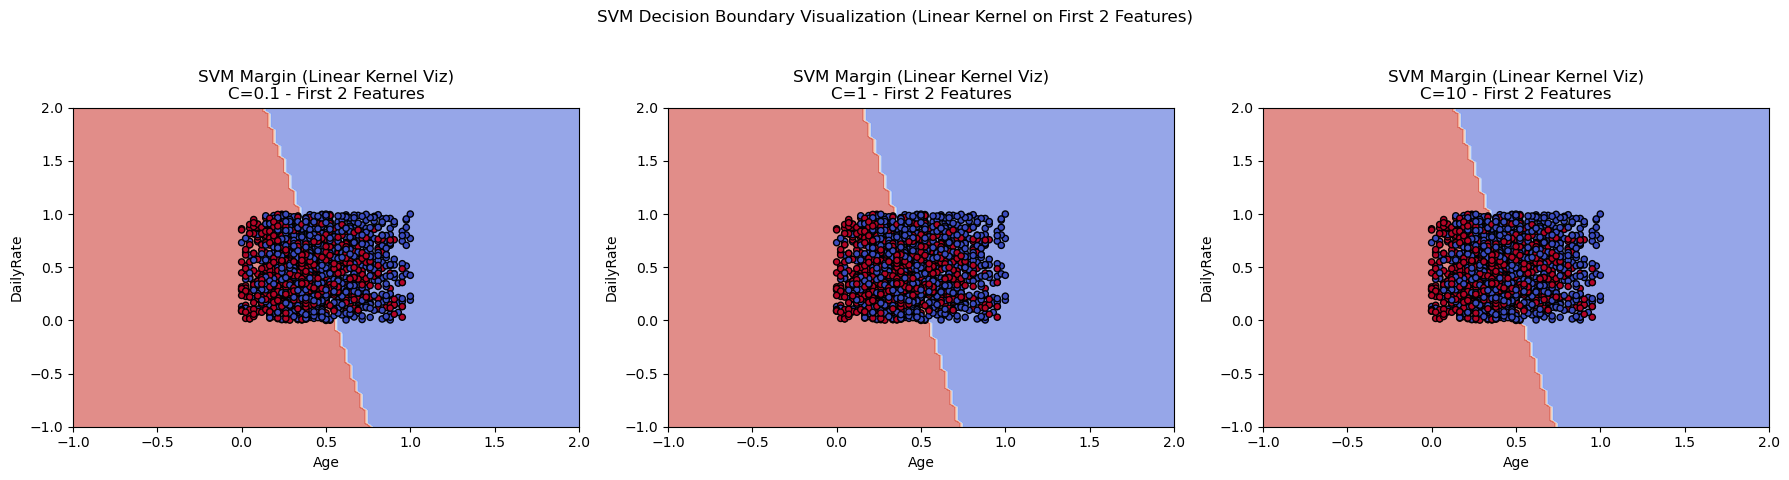

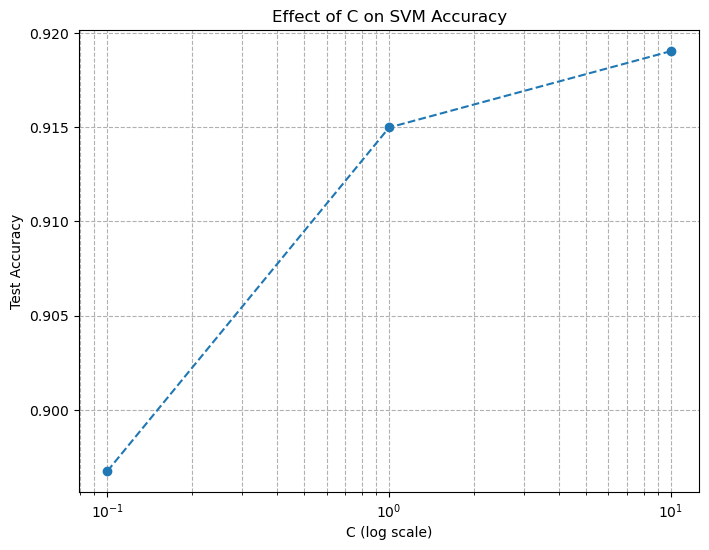

Best SVM selected with C=1 (AUC=0.9740)

Training Decision Tree Classifier...
Trying max_depth values: [2, 3, 5, 7, 10]
  max_depth=2: Accuracy=0.7935, AUC=0.8343
  max_depth=3: Accuracy=0.7874, AUC=0.8593
  max_depth=5: Accuracy=0.8259, AUC=0.9049
  max_depth=7: Accuracy=0.8360, AUC=0.8557
  max_depth=10: Accuracy=0.8421, AUC=0.8415
Best Decision Tree selected with max_depth=5 (AUC=0.9049)

Training Multi-layer Perceptron (Neural Network)...
Trying architectures: [{'hidden_layer_sizes': (50,), 'activation': 'relu'}, {'hidden_layer_sizes': (100, 50), 'activation': 'relu'}, {'hidden_layer_sizes': (50, 50), 'activation': 'tanh'}]
  Architecture: {'hidden_layer_sizes': (50,), 'activation': 'relu'}
    Accuracy=0.8947, AUC=0.9561
  Architecture: {'hidden_layer_sizes': (100, 50), 'activation': 'relu'}
    Accuracy=0.9211, AUC=0.9678
  Architecture: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh'}
    Accuracy=0.9312, AUC=0.9663
Best Neural Network selected with architecture={'hidden_l

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWar

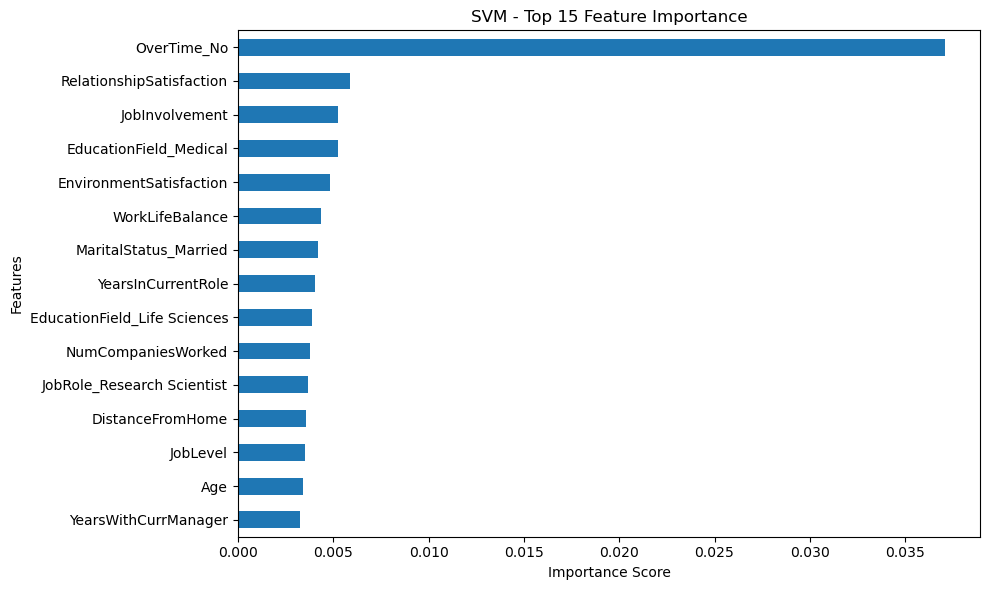


Plotting Feature Importance for: Decision Tree


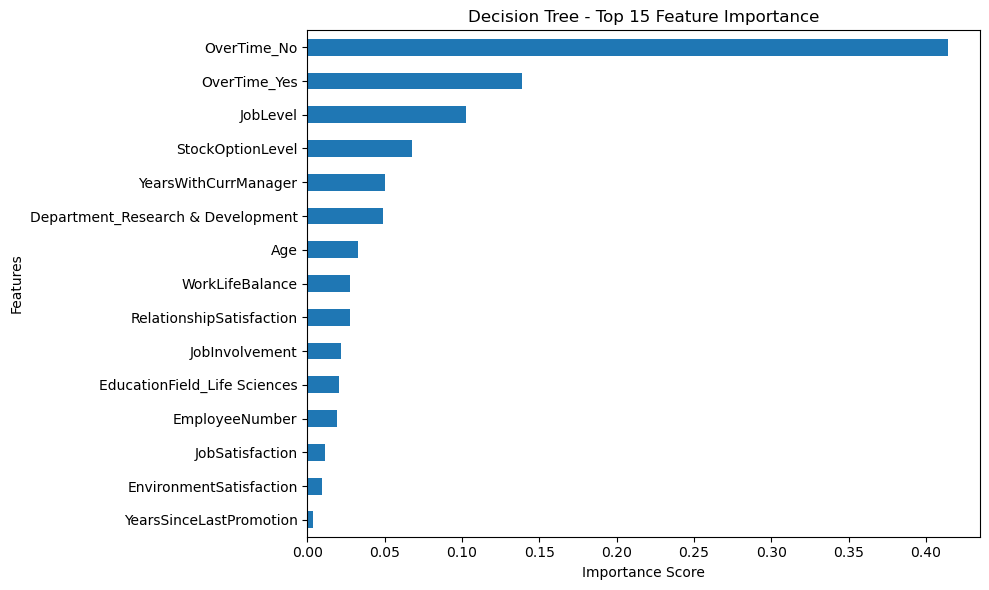


Plotting Feature Importance for: Neural Network
  Calculating Permutation Importance for Neural Network...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-

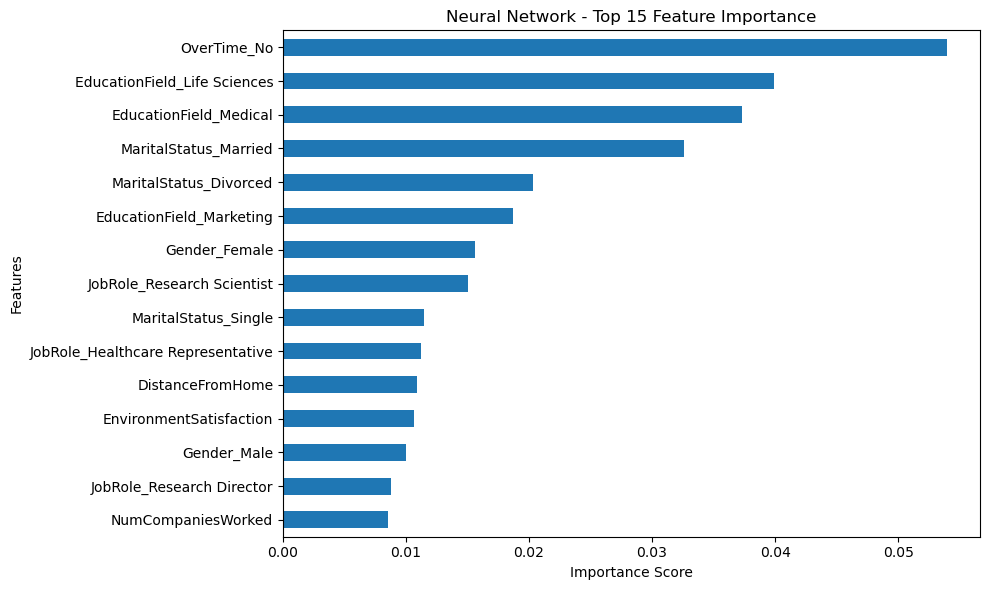


Plotting Feature Importance for: Logistic Regression


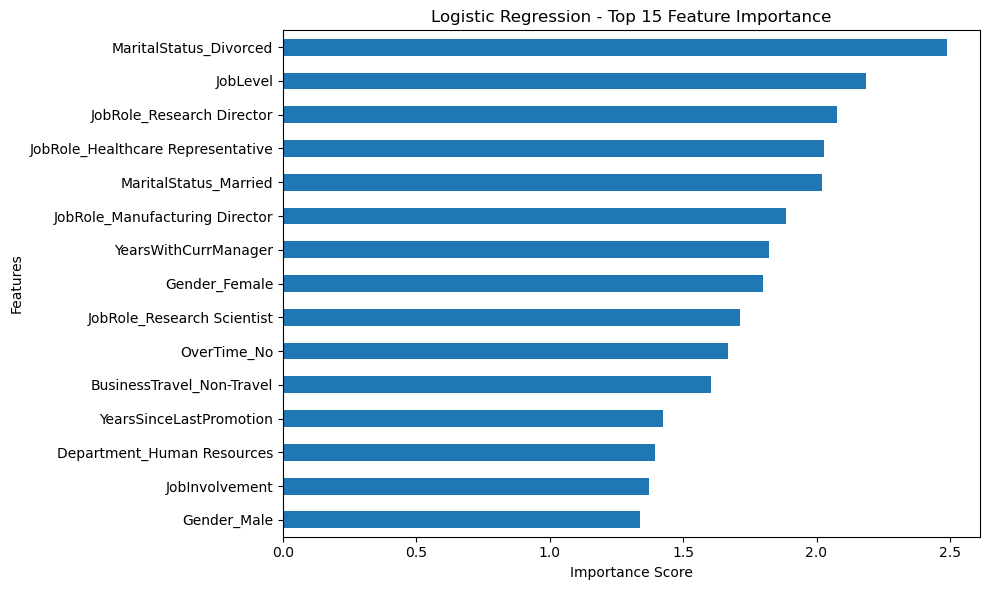


Plotting Feature Importance for: Naive Bayes
  Skipping Naive Bayes (no standard importance attribute).

--- Generating Final Evaluations ---

Calculating & Plotting Metrics for each model:

--- SVM ---
Recall (Class 1): 0.8502
Test Accuracy: 0.9150
Test AUC: 0.9740

Classification Report:
              precision    recall  f1-score   support

          No       0.87      0.98      0.92       247
         Yes       0.98      0.85      0.91       247

    accuracy                           0.91       494
   macro avg       0.92      0.91      0.91       494
weighted avg       0.92      0.91      0.91       494


--- Decision Tree ---
Recall (Class 1): 0.8057
Test Accuracy: 0.8259
Test AUC: 0.9049

Classification Report:
              precision    recall  f1-score   support

          No       0.81      0.85      0.83       247
         Yes       0.84      0.81      0.82       247

    accuracy                           0.83       494
   macro avg       0.83      0.83      0.83       49

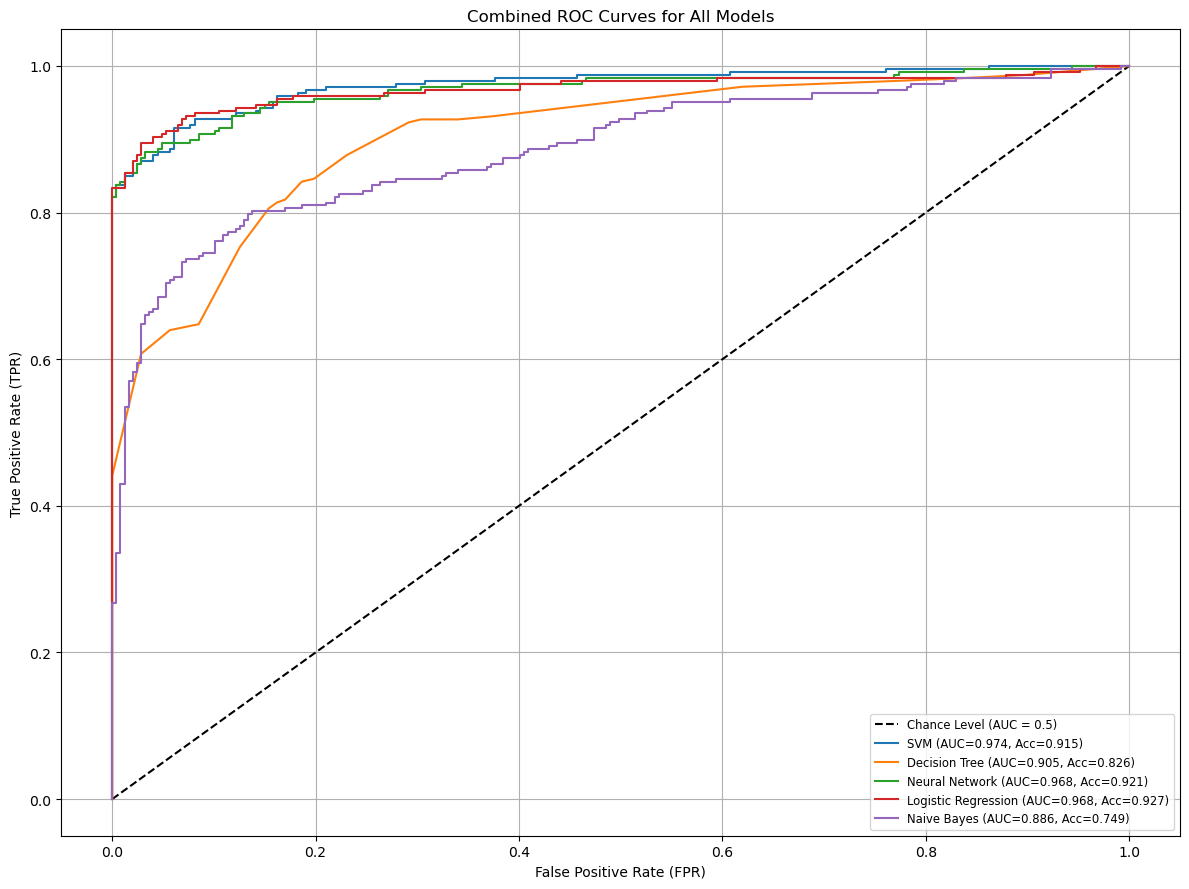

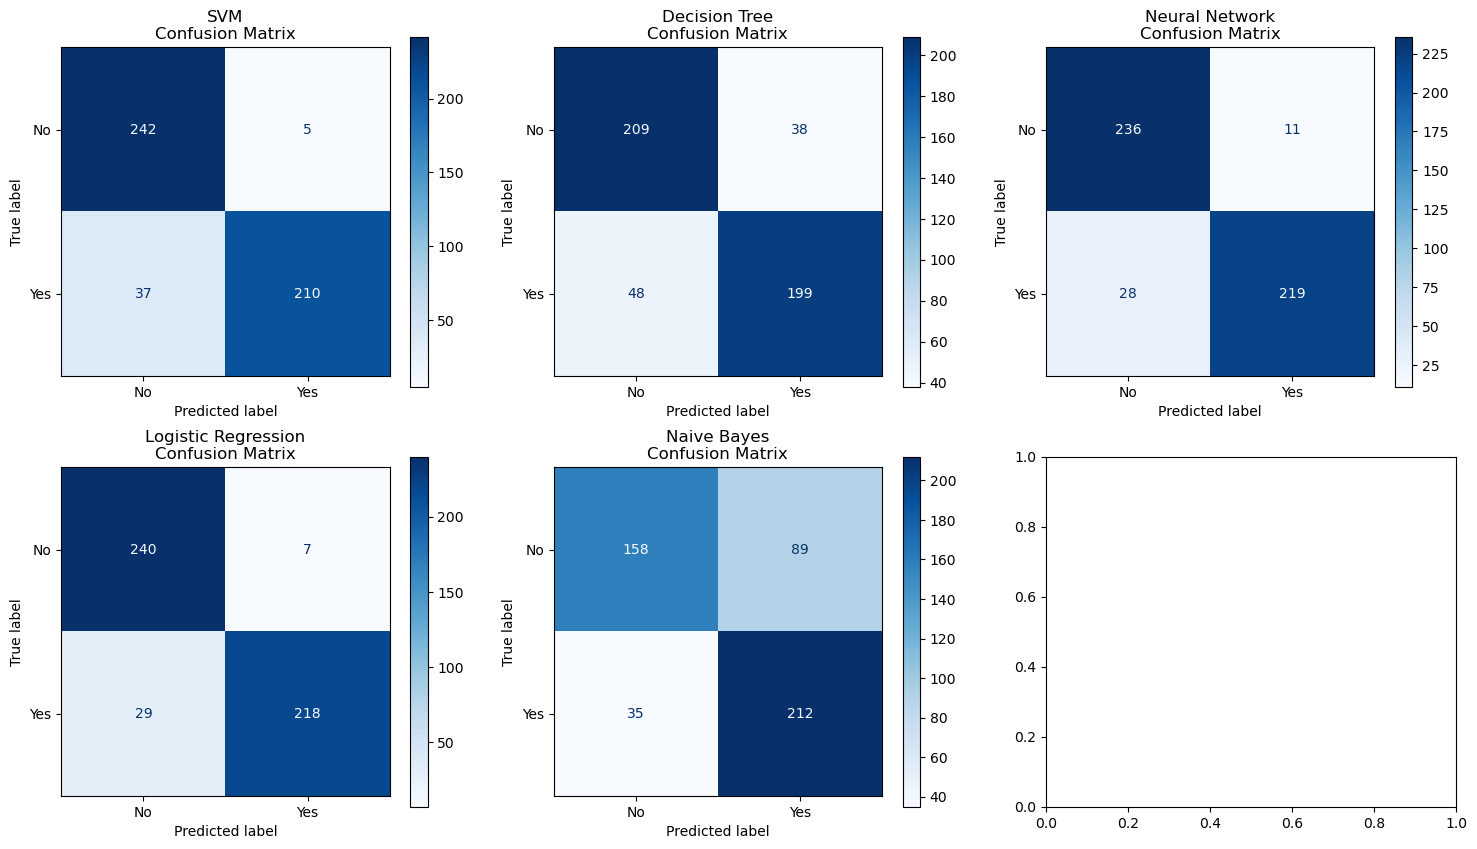

<Figure size 640x480 with 0 Axes>

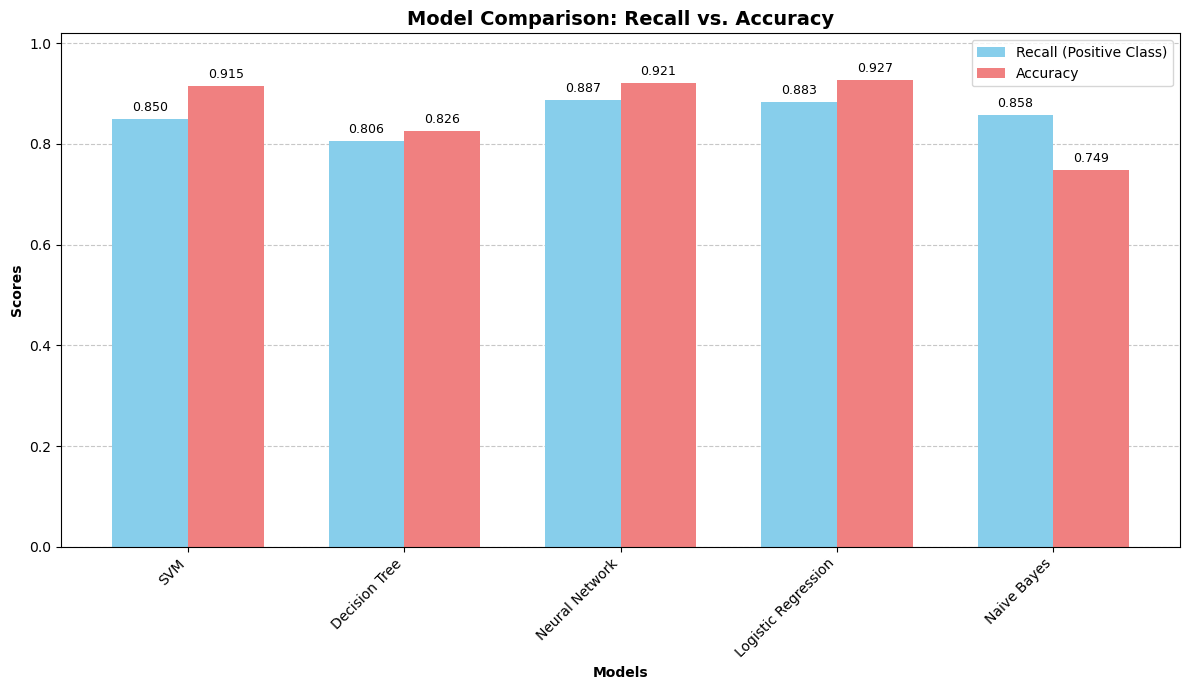


--- Final Test Metrics Summary ---
Model               Accuracy     AUC          Recall      
----------------------------------------------------------
SVM                 0.9150       0.9740       0.8502      
Logistic Regression 0.9271       0.9680       0.8826      
Neural Network      0.9211       0.9678       0.8866      
Decision Tree       0.8259       0.9049       0.8057      
Naive Bayes         0.7490       0.8865       0.8583      

--- Final Model Comparison (Sorted by AUC) ---
                 Model                         Best Hyperparameters / Selection  Test Accuracy  Test AUC
0                  SVM                                                      C=1       0.914980  0.974004
1  Logistic Regression                       Backward Elimination (27 features)       0.927126  0.968038
2       Neural Network  {'hidden_layer_sizes': (100, 50), 'activation': 'relu'}       0.921053  0.967824
3        Decision Tree                                              max_depth=5    

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Encoded
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,0


In [47]:
# Full Machine Learning Pipeline
# Author: ChatGPT x Neha Collaboration 🚀 (Corrected Version)

# 1. Import Libraries
import warnings
import sklearn # Import sklearn or the specific module generating the warning

# General ignore (keep this)
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, ConfusionMatrixDisplay
from sklearn.inspection import permutation_importance, DecisionBoundaryDisplay

# 2. Load Dataset
try:
    # --- USER ACTION REQUIRED ---
    # --- CHANGE 'balanced.csv' to your dataset file path ---
    data = pd.read_csv('dataset_attrition_balanced.csv')
    # --------------------------
    print("Data loaded successfully.")
    print("Original Data shape:", data.shape)
except FileNotFoundError:
    print("Error: 'balanced.csv' not found. Please update the file path.")
    exit() # Exit if the file doesn't exist

# --- USER ACTION REQUIRED ---
# --- CHANGE 'Attrition' to the name of your target label column ---
TARGET_COLUMN = 'Attrition'
# --------------------------
data.head()
if TARGET_COLUMN not in data.columns:
    print(f"Error: Target column '{TARGET_COLUMN}' not found in the dataset.")
    exit() # Exit if the target column doesn't exist

# 3. Preprocessing
print("\n--- Starting Preprocessing ---")
## 3.1 Handling Missing Values
# Numerical features
num_cols = data.select_dtypes(include=np.number).columns
if not num_cols.empty:
    imputer_num = SimpleImputer(strategy='mean')
    data[num_cols] = imputer_num.fit_transform(data[num_cols])
    print("Missing numerical values imputed with mean.")
# Categorical features
cat_cols = data.select_dtypes(include='object').columns
if not cat_cols.empty:
    imputer_cat = SimpleImputer(strategy='most_frequent')
    data[cat_cols] = imputer_cat.fit_transform(data[cat_cols])
    print("Missing categorical values imputed with most frequent.")

## 3.2 Handling Outliers (Identification and Visualization Only)
outlier_counts = {}
num_cols_for_outliers = data.select_dtypes(include=np.number).columns
# Exclude the target column if it's numeric before outlier check
if TARGET_COLUMN in num_cols_for_outliers:
     num_cols_for_outliers = num_cols_for_outliers.drop(TARGET_COLUMN)

if not num_cols_for_outliers.empty:
    print("\nChecking for outliers using IQR method...")
    for col in num_cols_for_outliers:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outliers = ((data[col] < lower) | (data[col] > upper)).sum()
        outlier_counts[col] = outliers

    # Outlier Summary
    outlier_df = pd.DataFrame.from_dict(outlier_counts, orient='index', columns=['Outlier_Count'])
    outlier_df = outlier_df[outlier_df['Outlier_Count'] > 0].sort_values(by='Outlier_Count', ascending=False)

    if not outlier_df.empty:
        print("\nTop 5 Features with most outliers:\n", outlier_df.head())

        # Plot for top 3 features with heavy outliers
        heavy_outliers = outlier_df.head(3).index
        print("\nVisualizing outliers for top 3 features...")
        plt.figure(figsize=(15, 4))
        for i, col in enumerate(heavy_outliers, 1):
            plt.subplot(1, len(heavy_outliers), i)
            sns.boxplot(x=data[col])
            plt.title(f'Outliers in {col}')
        plt.tight_layout()
        plt.show()
    else:
        print("\nNo outliers detected based on IQR method.")
else:
    print("\nNo numerical columns (excluding target) found for outlier detection.")


## 3.3 Label Encoding (for object type columns)
print("\nApplying Label Encoding to object type columns...")
label_encoders = {} # Store encoders if needed later
obj_cols = data.select_dtypes(include='object').columns
if TARGET_COLUMN in obj_cols and data[TARGET_COLUMN].dtype == 'object':
    print(f"Label Encoding target variable: {TARGET_COLUMN}")
    le_target = LabelEncoder()
    data[TARGET_COLUMN] = le_target.fit_transform(data[TARGET_COLUMN])
    label_encoders[TARGET_COLUMN] = le_target # Store if needed

# Encode feature columns
feature_obj_cols = obj_cols.drop(TARGET_COLUMN, errors='ignore')
for col in feature_obj_cols:
     print(f"Label Encoding feature: {col}")
     le = LabelEncoder()
     data[col] = le.fit_transform(data[col])
     label_encoders[col] = le # Store if needed

# --- Preprocessing Done ---






# 4. Splitting Data
print("\n--- Splitting Data ---")
X = data.drop(TARGET_COLUMN, axis=1)
y = data[TARGET_COLUMN]

# Ensure target is binary (0 or 1) after potential label encoding
if y.nunique() > 2:
    print(f"Warning: Target variable '{TARGET_COLUMN}' has more than 2 unique values after encoding. This script assumes binary classification.")
    # Consider adding logic here to handle multi-class or raise an error

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
print(f"Data split into Train ({X_train.shape[0]} samples) and Test ({X_test.shape[0]} samples).")

## 4.1 Scaling (AFTER splitting to prevent data leakage)
print("\nApplying MinMaxScaler to features (fitting on Train, transforming Train & Test)...")
# Only scale feature columns (X)
feature_columns = X_train.columns
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame to keep column names (optional but often helpful)
X_train = pd.DataFrame(X_train_scaled, index=X_train.index, columns=feature_columns)
X_test = pd.DataFrame(X_test_scaled, index=X_test.index, columns=feature_columns)
print("Features scaled.")

# --- Data Ready for Modeling ---

# 5. Modeling
print("\n--- Starting Modeling ---")
models = {}
results = []
# Store selected features for LR if needed later
lr_selected_features = None
lr_feature_selection_method = None
data.head()
# --- SVM ---
print("\nTraining Support Vector Machine (SVM)...")
best_auc_svm = 0
best_model_svm = None
best_C = None
C_values = [0.1, 1, 10]
accuracies_svm = []

# Create figure for SVM decision boundary visualization
num_c_values = len(C_values)
fig_svm_viz, axes_svm_viz = plt.subplots(1, num_c_values, figsize=(6 * num_c_values, 5))
if num_c_values == 1: # Handle case of single C value for subplotting
     axes_svm_viz = [axes_svm_viz] # Make it iterable

print("Trying C values:", C_values)
for idx, C in enumerate(C_values):
    svm = SVC(C=C, probability=True, random_state=42, kernel='rbf') # Default RBF kernel
    svm.fit(X_train, y_train)
    y_pred_svm = svm.predict(X_test)
    # Use predict_proba for AUC calculation
    try:
        auc_svm = roc_auc_score(y_test, svm.predict_proba(X_test)[:, 1])
    except ValueError as e:
         print(f"  Warning: Could not calculate AUC for SVM with C={C}. Error: {e}")
         auc_svm = 0.0 # Assign default value or handle appropriately

    acc_svm = accuracy_score(y_test, y_pred_svm)
    accuracies_svm.append(acc_svm)
    print(f"  C={C}: Accuracy={acc_svm:.4f}, AUC={auc_svm:.4f}")

    if auc_svm > best_auc_svm:
        best_model_svm = svm
        best_C = C
        best_auc_svm = auc_svm

    # For visualization: plot decision boundary (only for first two features)
    if X_train.shape[1] >= 2: # Only plot if there are at least 2 features
        X_vis = X_train.iloc[:, :2] # taking first 2 features for 2D visualization
        y_vis = y_train
        svm_vis = SVC(C=C, kernel='linear', probability=True, random_state=42) # Use linear for clear viz
        try:
            svm_vis.fit(X_vis, y_vis)
            DecisionBoundaryDisplay.from_estimator(svm_vis, X_vis, response_method="predict",
                                                   cmap='coolwarm', alpha=0.6, ax=axes_svm_viz[idx],
                                                   xlabel=X_vis.columns[0], ylabel=X_vis.columns[1])
            scatter = axes_svm_viz[idx].scatter(X_vis.iloc[:,0], X_vis.iloc[:,1], c=y_vis, cmap='coolwarm', edgecolors='k', s=20)
            axes_svm_viz[idx].set_title(f'SVM Margin (Linear Kernel Viz)\nC={C} - First 2 Features')
            # Optional: add a legend to the scatter plot
            # handles, labels = scatter.legend_elements()
            # axes_svm_viz[idx].legend(handles=handles, labels=list(label_encoders[TARGET_COLUMN].classes_) if TARGET_COLUMN in label_encoders else ['0', '1'], title="Classes")

        except Exception as e:
             print(f"  Could not generate decision boundary plot for C={C}. Error: {e}")
             axes_svm_viz[idx].set_title(f'SVM (Viz Error)\nC={C}')
    else:
         axes_svm_viz[idx].set_title(f'SVM (Need >=2 features for Viz)\nC={C}')

fig_svm_viz.suptitle('SVM Decision Boundary Visualization (Linear Kernel on First 2 Features)')
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
plt.show()

# Plot C vs Accuracy for SVM
plt.figure(figsize=(8,6))
plt.plot(C_values, accuracies_svm, marker='o', linestyle='--')
plt.xscale('log')
plt.xlabel('C (log scale)')
plt.ylabel('Test Accuracy')
plt.title('Effect of C on SVM Accuracy')
plt.grid(True, which="both", ls="--")
plt.show()

# Save best SVM
if best_model_svm:
    models['SVM'] = best_model_svm
    results.append(('SVM', f'C={best_C}', accuracy_score(y_test, best_model_svm.predict(X_test)), best_auc_svm))
    print(f"Best SVM selected with C={best_C} (AUC={best_auc_svm:.4f})")
else:
    print("Warning: No best SVM model found (possibly due to errors).")


# --- Decision Tree ---
print("\nTraining Decision Tree Classifier...")
best_auc_tree = 0
best_model_tree = None
best_depth = None
# Added smaller depths, removed None for potentially better generalization
depth_values = [2, 3, 5, 7, 10]
print("Trying max_depth values:", depth_values)

for depth in depth_values:
    tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    tree.fit(X_train, y_train)
    y_pred_tree = tree.predict(X_test)
    # Use predict_proba for AUC calculation
    try:
        auc_tree = roc_auc_score(y_test, tree.predict_proba(X_test)[:, 1])
    except ValueError as e:
        print(f"  Warning: Could not calculate AUC for Tree with max_depth={depth}. Error: {e}")
        auc_tree = 0.0 # Assign default value

    acc_tree = accuracy_score(y_test, y_pred_tree)
    print(f"  max_depth={depth}: Accuracy={acc_tree:.4f}, AUC={auc_tree:.4f}")

    if auc_tree > best_auc_tree:
        best_model_tree = tree
        best_depth = depth
        best_auc_tree = auc_tree

# Save best Decision Tree
if best_model_tree:
    models['Decision Tree'] = best_model_tree
    # Calculate metrics for the final selected model again for consistency
    final_acc_tree = accuracy_score(y_test, best_model_tree.predict(X_test))
    final_auc_tree = roc_auc_score(y_test, best_model_tree.predict_proba(X_test)[:,1])
    results.append(('Decision Tree', f'max_depth={best_depth}', final_acc_tree, final_auc_tree))
    print(f"Best Decision Tree selected with max_depth={best_depth} (AUC={final_auc_tree:.4f})")
else:
    print("Warning: No best Decision Tree model found.")


# --- Neural Network (MLPClassifier) ---
print("\nTraining Multi-layer Perceptron (Neural Network)...")
architectures = [
    {'hidden_layer_sizes': (50,), 'activation': 'relu'},
    {'hidden_layer_sizes': (100, 50), 'activation': 'relu'},
    {'hidden_layer_sizes': (50, 50), 'activation': 'tanh'},
    #{'hidden_layer_sizes': (100,), 'activation': 'logistic'} # Logistic can sometimes be slow/less effective
]
best_auc_nn = 0
best_model_nn = None
best_arch = None

print("Trying architectures:", architectures)
for arch in architectures:
    print(f"  Architecture: {arch}")
    nn = MLPClassifier(hidden_layer_sizes=arch['hidden_layer_sizes'],
                       activation=arch['activation'],
                       max_iter=500, # Reduced from 1000 for potentially faster runs, adjust if needed
                       random_state=42,
                       early_stopping=True, # Added early stopping
                       n_iter_no_change=10) # Stops if validation score doesn't improve
    nn.fit(X_train, y_train)
    y_pred_nn = nn.predict(X_test)
    # Use predict_proba for AUC calculation
    try:
        auc_nn = roc_auc_score(y_test, nn.predict_proba(X_test)[:, 1])
    except ValueError as e:
        print(f"    Warning: Could not calculate AUC for NN with arch={arch}. Error: {e}")
        auc_nn = 0.0 # Assign default value

    acc_nn = accuracy_score(y_test, y_pred_nn)
    print(f"    Accuracy={acc_nn:.4f}, AUC={auc_nn:.4f}")

    if auc_nn > best_auc_nn:
        best_model_nn = nn
        best_arch = arch
        best_auc_nn = auc_nn

# Save best Neural Network
if best_model_nn:
    models['Neural Network'] = best_model_nn
    final_acc_nn = accuracy_score(y_test, best_model_nn.predict(X_test))
    final_auc_nn = roc_auc_score(y_test, best_model_nn.predict_proba(X_test)[:,1])
    results.append(('Neural Network', str(best_arch), final_acc_nn, final_auc_nn))
    print(f"Best Neural Network selected with architecture={best_arch} (AUC={final_auc_nn:.4f})")
else:
    print("Warning: No best Neural Network model found.")


# --- Logistic Regression with Feature Selection ---
print("\nTraining Logistic Regression with Feature Selection...")
lr = LogisticRegression(max_iter=1000, random_state=42, solver='liblinear') # Changed solver for potential compatibility

# Forward Selection
print("  Performing Forward Selection...")
# n_features_to_select='auto' might need tol, or set to fixed number/float
# Let's try selecting half the features as a starting point, adjust as needed
n_features = X_train.shape[1]
n_select = max(1, int(n_features / 2)) # Ensure at least 1 feature
print(f"    Targeting selection of around {n_select} features (can vary with 'auto' based on tolerance).")

sfs_forward = SequentialFeatureSelector(lr,
                                        direction='forward',
                                        n_features_to_select=n_select, #'auto', # Can use 'auto', a number, or float
                                        # tol=0.001, # Use tol if n_features_to_select='auto'
                                        cv=5, # 5-fold cross-validation during selection
                                        n_jobs=-1) # Use all available CPU cores
sfs_forward.fit(X_train, y_train)
X_train_forward = sfs_forward.transform(X_train)
X_test_forward = sfs_forward.transform(X_test)
selected_features_forward = sfs_forward.get_feature_names_out(X.columns) # Get names based on original X cols
print(f"    Forward Selection chose {len(selected_features_forward)} features: {', '.join(selected_features_forward)}")

lr_forward = LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')
lr_forward.fit(X_train_forward, y_train)
auc_forward = roc_auc_score(y_test, lr_forward.predict_proba(X_test_forward)[:,1])
acc_forward = accuracy_score(y_test, lr_forward.predict(X_test_forward))
print(f"    Forward Selection Model: Accuracy={acc_forward:.4f}, AUC={auc_forward:.4f}")


# Backward Elimination
print("\n  Performing Backward Elimination...")
sfs_backward = SequentialFeatureSelector(lr,
                                         direction='backward',
                                         n_features_to_select=n_select, # 'auto',
                                         # tol=0.001, # Use tol if n_features_to_select='auto'
                                         cv=5,
                                         n_jobs=-1)
sfs_backward.fit(X_train, y_train)
X_train_backward = sfs_backward.transform(X_train)
X_test_backward = sfs_backward.transform(X_test)
selected_features_backward = sfs_backward.get_feature_names_out(X.columns) # Get names based on original X cols
print(f"    Backward Elimination chose {len(selected_features_backward)} features: {', '.join(selected_features_backward)}")


lr_backward = LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')
lr_backward.fit(X_train_backward, y_train)
auc_backward = roc_auc_score(y_test, lr_backward.predict_proba(X_test_backward)[:,1])
acc_backward = accuracy_score(y_test, lr_backward.predict(X_test_backward))
print(f"    Backward Elimination Model: Accuracy={acc_backward:.4f}, AUC={auc_backward:.4f}")


# Pick best of forward/backward based on AUC
print("\nSelecting best Logistic Regression model (Forward vs. Backward)...")
if auc_forward >= auc_backward: # Favor forward if equal
    print(f"  Choosing Forward Selection (AUC={auc_forward:.4f})")
    models['Logistic Regression'] = lr_forward
    results.append(('Logistic Regression', f'Forward Selection ({len(selected_features_forward)} features)', acc_forward, auc_forward))
    lr_selected_features = selected_features_forward
    lr_feature_selection_method = 'Forward'
    # Store pointers to the correct transformed data for later use
    X_train_lr = X_train_forward
    X_test_lr = X_test_forward
else:
    print(f"  Choosing Backward Elimination (AUC={auc_backward:.4f})")
    models['Logistic Regression'] = lr_backward
    results.append(('Logistic Regression', f'Backward Elimination ({len(selected_features_backward)} features)', acc_backward, auc_backward))
    lr_selected_features = selected_features_backward
    lr_feature_selection_method = 'Backward'
    # Store pointers to the correct transformed data for later use
    X_train_lr = X_train_backward
    X_test_lr = X_test_backward


# --- Naive Bayes ---
print("\nTraining Gaussian Naive Bayes...")
nb = GaussianNB()
nb.fit(X_train, y_train) # Fits on all (scaled) features
models['Naive Bayes'] = nb
acc_nb = accuracy_score(y_test, nb.predict(X_test))
auc_nb = roc_auc_score(y_test, nb.predict_proba(X_test)[:,1])
results.append(('Naive Bayes', 'No Hyperparameters Tuned', acc_nb, auc_nb))
print(f"  Naive Bayes: Accuracy={acc_nb:.4f}, AUC={auc_nb:.4f}")

print("\n--- Modeling Complete ---")


# 6. Feature Importance (Top 15)
print("\n--- Generating Feature Importance Plots ---")

def plot_feature_importance(model, model_name, feature_names, X_train_subset=None, y_train_subset=None):
    """
    Plots feature importance for a given model.
    Handles coefficients, tree importances, and permutation importance.
    Requires correct feature_names matching the model's input.
    X_train_subset and y_train_subset are needed for permutation_importance.
    """
    importances = None
    use_permutation = False

    if hasattr(model, 'coef_'): # Logistic Regression, Linear SVM
        # Coef might be nested (e.g., coef_[0])
        if isinstance(model.coef_, np.ndarray) and model.coef_.ndim == 2:
             # Check if model coef shape matches the number of features it was trained on
             if model.coef_[0].shape[0] == len(feature_names):
                 importances = np.abs(model.coef_[0])
             else:
                  print(f"  Warning: Coefficient shape ({model.coef_[0].shape[0]}) mismatch with provided feature names ({len(feature_names)}) for {model_name}. Attempting Permutation Importance.")
                  use_permutation = True
        else:
             print(f"  Warning: Could not interpret coefficients for {model_name}. Attempting Permutation Importance.")
             use_permutation = True

    elif hasattr(model, 'feature_importances_'): # Decision Tree, RandomForest, GradientBoosting etc.
         if len(model.feature_importances_) == len(feature_names):
              importances = model.feature_importances_
         else:
              print(f"  Warning: feature_importances_ shape ({len(model.feature_importances_)}) mismatch with provided feature names ({len(feature_names)}) for {model_name}. Attempting Permutation Importance.")
              use_permutation = True

    else: # Fallback for others (like MLP, non-linear SVM, or if coef_/importances_ failed)
        use_permutation = True

    if use_permutation:
        print(f"  Calculating Permutation Importance for {model_name}...")
        if X_train_subset is None or y_train_subset is None:
             print(f"  Error: X_train_subset and y_train_subset required for Permutation Importance ({model_name}). Skipping plot.")
             return
        if X_train_subset.shape[1] != len(feature_names):
             print(f"  Error: X_train_subset columns ({X_train_subset.shape[1]}) don't match feature names ({len(feature_names)}) for Permutation Importance ({model_name}). Skipping plot.")
             return

        # Ensure X_train_subset is numpy array for permutation importance if it isn't already
        if isinstance(X_train_subset, pd.DataFrame):
            X_train_subset_np = X_train_subset.to_numpy()
        else:
            X_train_subset_np = X_train_subset # Assume it's already numpy

        result = permutation_importance(model, X_train_subset_np, y_train_subset, n_repeats=10, random_state=42, n_jobs=-1)
        importances = result.importances_mean

    if importances is None:
        print(f"  Could not determine feature importances for {model_name}. Skipping plot.")
        return

    # Check final length match just in case
    if len(importances) != len(feature_names):
         print(f"  Final importance length ({len(importances)}) mismatch with feature names ({len(feature_names)}) for {model_name}. Skipping plot.")
         return

    feat_imp = pd.Series(importances, index=feature_names)
    top_15_imp = feat_imp.nlargest(15).sort_values() # Sort for plotting

    plt.figure(figsize=(10, 6))
    top_15_imp.plot(kind='barh', title=f'{model_name} - Top 15 Feature Importance')
    plt.xlabel('Importance Score')
    plt.ylabel('Features')
    plt.tight_layout()
    plt.show()


# Plot importance for each model
for model_name, model in models.items():
    print(f"\nPlotting Feature Importance for: {model_name}")
    if model_name == 'Logistic Regression':
        # Use the selected features and the corresponding training data subset
        if lr_selected_features is not None:
             plot_feature_importance(model, model_name, lr_selected_features, X_train_lr, y_train)
        else:
             print("  Skipping LR importance plot (feature selection details missing).")
    elif model_name == 'Naive Bayes':
        print("  Skipping Naive Bayes (no standard importance attribute).")
        # Could potentially use permutation importance if desired:
        # plot_feature_importance(model, model_name, X_train.columns, X_train, y_train)
    elif model_name == 'SVM' and model.kernel != 'linear':
         # Use permutation importance for non-linear SVM
         print("  SVM Kernel is not linear, using Permutation Importance.")
         plot_feature_importance(model, model_name, X_train.columns, X_train, y_train)
    else:
        # For Decision Tree, Linear SVM (if used), MLP (using permutation) etc.
        # Pass the full scaled training set and original column names
        plot_feature_importance(model, model_name, X_train.columns, X_train, y_train)


# 7. Evaluation: ROC Curves, Confusion Matrices, Classification Reports, Recall Comparison
print("\n--- Generating Final Evaluations ---")

# --- Import recall_score if not already imported ---
from sklearn.metrics import recall_score # Make sure this is imported

# --- Plotting Setup ---
# ROC Curve Plot - Initialize the figure *before* the loop
fig_roc, ax_roc = plt.subplots(figsize=(12, 9)) # Use subplots for easier handling
ax_roc.plot([0, 1], [0, 1], 'k--', label='Chance Level (AUC = 0.5)') # Reference line

# Confusion Matrix Plot Setup (remains the same)
num_models = len(models)
# Adjust layout based on number of models
if num_models <= 0:
     print("No models found in the 'models' dictionary. Skipping evaluation.")
     # Set defaults to avoid errors if loop doesn't run
     fig_cm = None
     axes_cm_flat = []
else:
    if num_models <= 3:
        nrows_cm, ncols_cm = 1, num_models
        figsize_cm = (6 * num_models, 5)
    elif num_models <= 6:
        nrows_cm, ncols_cm = 2, 3
        figsize_cm = (18, 10)
    else: # Add more rows if many models
        nrows_cm = (num_models + 2) // 3
        ncols_cm = 3
        figsize_cm = (18, 6 * nrows_cm)

    fig_cm, axes_cm = plt.subplots(nrows_cm, ncols_cm, figsize=figsize_cm, squeeze=False)
    axes_cm_flat = axes_cm.flatten() # Flatten for easy iteration

# --- Data Collection for Plots ---
model_metrics = {} # Store metrics: {'ModelName': {'acc': float, 'auc': float, 'recall': float, 'fpr': list, 'tpr': list}}

print("\nCalculating & Plotting Metrics for each model:")
# Keep track of the loop index for plotting confusion matrices
model_plot_index = 0

for model_name, model in models.items(): # Iterate directly over potentially modified 'models' dict
    print(f"\n--- {model_name} ---")

    # Make predictions (handle LR with selected features)
    if model_name == 'Logistic Regression':
        # Check if LR feature selection ran successfully and X_test_lr exists
        if 'X_test_lr' not in locals() or X_test_lr is None:
             print(f"Warning: Logistic Regression data (X_test_lr) not found or invalid. Skipping LR evaluation.")
             continue # Skip to the next model in the loop
        try:
            y_pred_proba = model.predict_proba(X_test_lr)[:, 1]
            y_pred_labels = model.predict(X_test_lr)
        except Exception as e:
            print(f"Error predicting with Logistic Regression model: {e}. Skipping.")
            continue
    else:
        try:
            y_pred_proba = model.predict_proba(X_test)[:, 1]
            y_pred_labels = model.predict(X_test)
        except Exception as e:
            print(f"Error predicting with {model_name} model: {e}. Skipping.")
            continue


    # Calculate Metrics
    try:
        acc = accuracy_score(y_test, y_pred_labels)
        auc_score = roc_auc_score(y_test, y_pred_proba)
        # Calculate recall for the positive class (usually class '1')
        # Use average='binary' if target is binary, or specify pos_label if needed
        if len(np.unique(y_test)) == 2:
            # Make sure the positive label used here matches your target encoding (often 1)
            positive_label = 1 # Explicitly define positive label
            recall = recall_score(y_test, y_pred_labels, average='binary', pos_label=positive_label)
            print(f"Recall (Class {positive_label}): {recall:.4f}")
        else:
            # Handle multiclass recall - using weighted average as an example
            recall = recall_score(y_test, y_pred_labels, average='weighted')
            print(f"Recall (Weighted Avg): {recall:.4f}")

        print(f"Test Accuracy: {acc:.4f}")
        print(f"Test AUC: {auc_score:.4f}")

        # ROC Curve Data
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

        # Store metrics
        model_metrics[model_name] = {
            'acc': acc,
            'auc': auc_score,
            'recall': recall,
            'fpr': fpr,
            'tpr': tpr
        }

        # Plot ROC curve on the shared figure's axes (ax_roc)
        ax_roc.plot(fpr, tpr, label=f'{model_name} (AUC={auc_score:.3f}, Acc={acc:.3f})')

        # Classification Report
        print("\nClassification Report:")
        target_names = None
        if TARGET_COLUMN in label_encoders:
            try:
                target_names = [str(cls) for cls in label_encoders[TARGET_COLUMN].classes_]
            except Exception as e:
                print(f"  Could not get class names from LabelEncoder, using defaults. Error: {e}")
        print(classification_report(y_test, y_pred_labels, target_names=target_names))

        # Confusion Matrix
        cm = confusion_matrix(y_test, y_pred_labels)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)

        # Plot confusion matrix only if subplot axes exist and index is valid
        if fig_cm is not None and model_plot_index < len(axes_cm_flat):
            ax_cm = axes_cm_flat[model_plot_index]
            disp.plot(cmap='Blues', values_format='d', ax=ax_cm)
            ax_cm.set_title(f'{model_name}\nConfusion Matrix')
            model_plot_index += 1 # Increment index only after successful plot
        elif fig_cm is not None:
             print(f"Warning: Not enough subplots allocated for {model_name}'s confusion matrix.")

    except ValueError as ve:
        print(f"Error calculating metrics for {model_name}: {ve}. This might happen if the model predicts only one class.")
        # Optionally remove the model from metrics if it failed completely
        if model_name in model_metrics:
            del model_metrics[model_name]
        continue # Skip to next model
    except Exception as e:
        print(f"An unexpected error occurred during evaluation for {model_name}: {e}")
        if model_name in model_metrics:
            del model_metrics[model_name]
        continue # Skip to next model


# --- Finalize and Display Plots ---

# Finalize Combined ROC Curve Plot
# Check if any model was successfully plotted
if model_metrics: # Only add legend and show if metrics were generated
    ax_roc.set_xlabel('False Positive Rate (FPR)')
    ax_roc.set_ylabel('True Positive Rate (TPR)')
    ax_roc.set_title('Combined ROC Curves for All Models')
    ax_roc.legend(loc='lower right', fontsize='small') # Adjust legend location and size
    ax_roc.grid(True)
    fig_roc.tight_layout()
    plt.show()
else:
    plt.close(fig_roc) # Close the empty figure if no models were plotted
    print("Skipping ROC plot display as no models were successfully evaluated.")


# Finalize Confusion Matrix Plot
# Check if fig_cm exists and if any model was plotted successfully
if fig_cm is not None and model_plot_index > 0:
    # Hide any unused confusion matrix subplots
    for j in range(model_plot_index, len(axes_cm_flat)):
        axes_cm_flat[j].axis('off')

    fig_cm.suptitle('Confusion Matrices for All Models', fontsize=16)
    # Adjust layout only if the figure exists
    try:
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    except ValueError:
        print("Warning: Could not apply tight_layout to confusion matrix figure.") # Handle potential layout errors
    plt.show()
elif fig_cm is not None:
     # If fig_cm was created but no models plotted, close it or hide all axes
     print("No models were successfully evaluated to show confusion matrices.")
     # Option 1: Close the figure
     plt.close(fig_cm)
     # Option 2: Hide all axes if you prefer to show an empty figure shell (less common)
     # for ax in axes_cm_flat:
     #     ax.axis('off')
     # fig_cm.suptitle('Confusion Matrices (No Models Evaluated)', fontsize=16)
     # plt.show()


# --- Recall vs. Accuracy Comparison Plot ---
# Check if model_metrics has data before plotting
if model_metrics:
    recall_scores = {name: metrics['recall'] for name, metrics in model_metrics.items()}
    acc_scores = {name: metrics['acc'] for name, metrics in model_metrics.items()}
    model_names = list(recall_scores.keys())
    recalls = list(recall_scores.values())
    accuracies = list(acc_scores.values()) # Get accuracies for comparison

    plt.figure(figsize=(12, 7))

    # Create bars for recall
    bar_width = 0.35
    index = np.arange(len(model_names))
    bars_recall = plt.bar(index, recalls, bar_width, label='Recall (Positive Class)', color='skyblue', zorder=2) # zorder places bars above grid

    # Create bars for accuracy next to recall
    bars_acc = plt.bar(index + bar_width, accuracies, bar_width, label='Accuracy', color='lightcoral', zorder=2)


    plt.xlabel('Models', fontweight='bold')
    plt.ylabel('Scores', fontweight='bold')
    plt.title('Model Comparison: Recall vs. Accuracy', fontsize=14, fontweight='bold')
    plt.xticks(index + bar_width / 2, model_names, rotation=45, ha="right") # Center ticks between the two bars
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7, zorder=1) # zorder places grid behind bars
    plt.ylim(0, max(max(recalls, default=1.0), max(accuracies, default=1.0)) * 1.1) # Set y-axis limit dynamically + 10%

    # Add score labels on top of bars
    for bar in bars_recall:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01, f'{yval:.3f}', va='bottom', ha='center', fontsize=9) # Add recall values slightly above bar
    for bar in bars_acc:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01, f'{yval:.3f}', va='bottom', ha='center', fontsize=9) # Add accuracy values slightly above bar


    plt.tight_layout()
    plt.show()
else:
    print("Skipping Recall/Accuracy comparison plot as no model metrics were generated.")


# --- Final Metrics Summary Print ---
# Check if model_metrics has data before printing
if model_metrics:
    print("\n--- Final Test Metrics Summary ---")
    # Sort models by AUC for the final printout, matching the results table if desired
    # Or sort by another metric like recall or accuracy:
    # sorted_models = sorted(model_metrics.items(), key=lambda item: item[1]['recall'], reverse=True) # Sort by Recall
    sorted_models = sorted(model_metrics.items(), key=lambda item: item[1]['auc'], reverse=True) # Sort by AUC

    # Determine appropriate width for model names
    max_name_len = max(len(name) for name in model_metrics.keys()) if model_metrics else 25
    header_format = f"{{:<{max_name_len}}} {{:<12}} {{:<12}} {{:<12}}"
    row_format = f"{{:<{max_name_len}}} {{:<12.4f}} {{:<12.4f}} {{:<12.4f}}"

    print(header_format.format('Model', 'Accuracy', 'AUC', 'Recall'))
    print("-" * (max_name_len + 12 + 12 + 12 + 3)) # Adjust divider length

    for model_name, metrics in sorted_models:
         print(row_format.format(model_name, metrics['acc'], metrics['auc'], metrics['recall']))
else:
    print("\n--- Final Test Metrics Summary ---")
    print("No models were successfully evaluated.")






# 8. Final Results Table
# The 'results' list was populated during model training/selection
final_results_df = pd.DataFrame(results, columns=['Model','Best Hyperparameters / Selection','Test Accuracy','Test AUC'])
final_results_df = final_results_df.sort_values(by='Test AUC', ascending=False).reset_index(drop=True)

print("\n--- Final Model Comparison (Sorted by AUC) ---")
print(final_results_df.to_string()) # .to_string() to print full dataframe without truncation


print("\n--- Pipeline Finished ---")
df.head()


--- Random Forest Classifier Variants ---

🌲 Random Forest Variant 1 - Params: {'n_estimators': 100, 'max_depth': None, 'max_features': 'sqrt'}
Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       986
           1       1.00      1.00      1.00       986

    accuracy                           1.00      1972
   macro avg       1.00      1.00      1.00      1972
weighted avg       1.00      1.00      1.00      1972



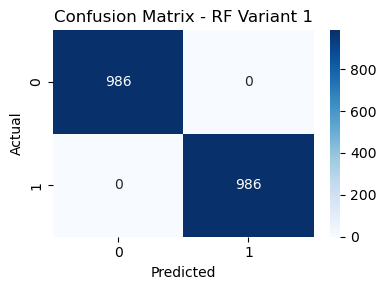


🌲 Random Forest Variant 2 - Params: {'n_estimators': 200, 'max_depth': 10, 'max_features': 'log2'}
Accuracy: 0.9975
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       986
           1       1.00      1.00      1.00       986

    accuracy                           1.00      1972
   macro avg       1.00      1.00      1.00      1972
weighted avg       1.00      1.00      1.00      1972



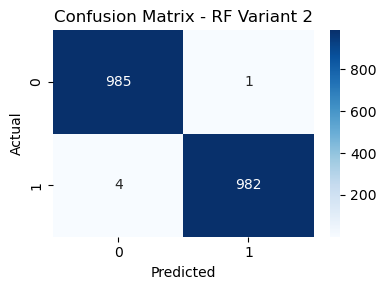


🌲 Random Forest Variant 3 - Params: {'n_estimators': 50, 'max_depth': 5, 'max_features': None}
Accuracy: 0.9042
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       986
           1       0.93      0.87      0.90       986

    accuracy                           0.90      1972
   macro avg       0.91      0.90      0.90      1972
weighted avg       0.91      0.90      0.90      1972



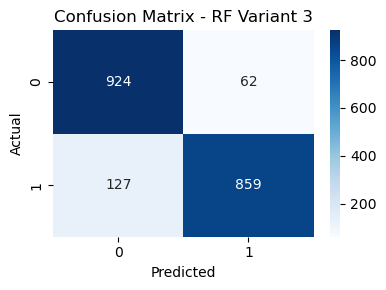


🌲 Random Forest Variant 4 - Params: {'n_estimators': 150, 'max_depth': 15, 'max_features': 0.5}
Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       986
           1       1.00      1.00      1.00       986

    accuracy                           1.00      1972
   macro avg       1.00      1.00      1.00      1972
weighted avg       1.00      1.00      1.00      1972



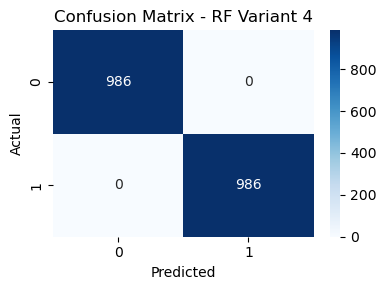

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define parameter variations
rf_configs = [
    {"n_estimators": 100, "max_depth": None, "max_features": "sqrt"},
    {"n_estimators": 200, "max_depth": 10, "max_features": "log2"},
    {"n_estimators": 50, "max_depth": 5, "max_features": None},
    {"n_estimators": 150, "max_depth": 15, "max_features": 0.5},
]

results = []

print("\n--- Random Forest Classifier Variants ---")
for i, params in enumerate(rf_configs, 1):
    print(f"\n🌲 Random Forest Variant {i} - Params: {params}")
    
    rf = RandomForestClassifier(random_state=42, **params)
    rf.fit(X_train, y_train)

    #rf.fit(X_resampled, y_resampled)
    y_pred = rf.predict(X_train)
    acc = accuracy_score(y_train, y_pred)
    
    acc = accuracy_score(y_train, y_pred)
    report = classification_report(y_train, y_pred, output_dict=True)
    cm = confusion_matrix(y_train, y_pred)

    # Store results
    results.append({
        "model": rf,
        "params": params,
        "accuracy": acc,
        "report": report,
        "conf_matrix": cm
    })

    # Print accuracy and classification report
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_train, y_pred))

    # Plot confusion matrix
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - RF Variant {i}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

In [51]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Define individual models
svm = SVC(probability=True, random_state=42)
dt = DecisionTreeClassifier(random_state=42)
nn = MLPClassifier(random_state=42, max_iter=500)

# Create a VotingClassifier
ensemble_model = VotingClassifier(
    estimators=[('svm', svm), ('dt', dt), ('nn', nn)],
    voting='soft'  # Use 'soft' voting for probabilities (better with mixed models)
)

# Train the ensemble
ensemble_model.fit(X_train, y_train)

# Predict
y_pred = ensemble_model.predict(X_test)

# Evaluate
print("Different Models Ensemble (SVM + DT + NN)")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))

Different Models Ensemble (SVM + DT + NN)
Accuracy: 0.9230769230769231
Precision: 0.923771528017206
Recall: 0.9230769230769231


In [53]:
# Different Decision Trees
dt1 = DecisionTreeClassifier(max_depth=3, random_state=42)
dt2 = DecisionTreeClassifier(max_depth=5, random_state=42)
dt3 = DecisionTreeClassifier(max_depth=None, random_state=42)

# Voting ensemble
ensemble_dt = VotingClassifier(
    estimators=[('dt1', dt1), ('dt2', dt2), ('dt3', dt3)],
    voting='soft'
)

# Train
ensemble_dt.fit(X_train, y_train)

# Predict
y_pred_dt = ensemble_dt.predict(X_test)

# Evaluate
print("\nSame Model Ensemble (Different Decision Trees)")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_dt, average='weighted'))


Same Model Ensemble (Different Decision Trees)
Accuracy: 0.8502024291497976
Precision: 0.8505701862334892
Recall: 0.8502024291497976


# Ensemble

In [6]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Define models
#svm = SVC(probability=True, random_state=42)
svm = SVC(C=C, probability=True, random_state=42, kernel='rbf')
dt = DecisionTreeClassifier(random_state=42)
nn = MLPClassifier(random_state=42, max_iter=500)

models = {
    'SVM': svm,
    'Decision Tree': dt,
    'Neural Network': nn
}

# Train and evaluate individual models
print("\n--- Individual Models Performance ---\n")
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} Results:")
    print("  Accuracy :", accuracy_score(y_test, y_pred))
    print("  Precision:", precision_score(y_test, y_pred, average='weighted'))
    print("  Recall   :", recall_score(y_test, y_pred, average='weighted'))
    print("")

# Ensemble Voting Classifier
ensemble_model = VotingClassifier(
    estimators=[('svm', svm), ('dt', dt), ('nn', nn)],
    voting='soft'
)
ensemble_model.fit(X_train, y_train)
y_pred_ensemble = ensemble_model.predict(X_test)

# Evaluate ensemble
print("\n--- Ensemble (SVM + DT + NN) Performance ---\n")
print("Accuracy :", accuracy_score(y_test, y_pred_ensemble))
print("Precision:", precision_score(y_test, y_pred_ensemble, average='weighted'))
print("Recall   :", recall_score(y_test, y_pred_ensemble, average='weighted'))


--- Individual Models Performance ---

SVM Results:
  Accuracy : 0.9190751445086706
  Precision: 0.9191311612364244
  Recall   : 0.9190751445086706

Decision Tree Results:
  Accuracy : 0.8265895953757225
  Precision: 0.8294072052033835
  Recall   : 0.8265895953757225

Neural Network Results:
  Accuracy : 0.9075144508670521
  Precision: 0.9075689223057645
  Recall   : 0.9075144508670521


--- Ensemble (SVM + DT + NN) Performance ---

Accuracy : 0.9190751445086706
Precision: 0.9190751445086706
Recall   : 0.9190751445086706


# 

In [8]:
# Different Decision Trees
dt1 = DecisionTreeClassifier(max_depth=3, random_state=42)
dt2 = DecisionTreeClassifier(max_depth=5, random_state=42)
dt4 = DecisionTreeClassifier(max_depth=7, random_state=42)
dt5 = DecisionTreeClassifier(max_depth=10, random_state=42)
dt3 = DecisionTreeClassifier(max_depth=None, random_state=42)

dt_models = {
    'DT max_depth=3': dt1,
    'DT max_depth=5': dt2,
    'DT max_depth=7': dt4,
    'DT max_depth=10': dt5,
    'DT no max_depth': dt3
}

# Train and evaluate individual decision trees
print("\n--- Individual Decision Trees Performance ---\n")
for name, model in dt_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} Results:")
    print("  Accuracy :", accuracy_score(y_test, y_pred))
    print("  Precision:", precision_score(y_test, y_pred, average='weighted'))
    print("  Recall   :", recall_score(y_test, y_pred, average='weighted'))
    print("")

# Ensemble of Decision Trees
ensemble_dt = VotingClassifier(
    estimators=[('dt1', dt1), ('dt2', dt2), ('dt4', dt4), ('dt5', dt5), ('dt3', dt3)],
    voting='soft'
)
ensemble_dt.fit(X_train, y_train)
y_pred_dt = ensemble_dt.predict(X_test)

# Evaluate ensemble
print("\n--- Ensemble (Different Decision Trees) Performance ---\n")
print("Accuracy :", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt, average='weighted'))
print("Recall   :", recall_score(y_test, y_pred_dt, average='weighted'))


--- Individual Decision Trees Performance ---

DT max_depth=3 Results:
  Accuracy : 0.7601156069364162
  Precision: 0.7601242983159583
  Recall   : 0.7601156069364162

DT max_depth=5 Results:
  Accuracy : 0.7774566473988439
  Precision: 0.7795583086453003
  Recall   : 0.7774566473988439

DT max_depth=7 Results:
  Accuracy : 0.838150289017341
  Precision: 0.8459645164598504
  Recall   : 0.838150289017341

DT max_depth=10 Results:
  Accuracy : 0.8410404624277457
  Precision: 0.8443657219973009
  Recall   : 0.8410404624277457

DT no max_depth Results:
  Accuracy : 0.8265895953757225
  Precision: 0.8294072052033835
  Recall   : 0.8265895953757225


--- Ensemble (Different Decision Trees) Performance ---

Accuracy : 0.8439306358381503
Precision: 0.8495839701137714
Recall   : 0.8439306358381503
